Load python packages

In [1]:
# I'm sure loads of these are unnecessary!

import pandas as pd
import numpy as np
import requests
import shutil
import os
import gzip
import copernicusmarine
from pathlib import Path
import re
from tqdm import tqdm
from urllib.request import urlretrieve
import xarray as xr
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from datetime import datetime
from scipy import interpolate
from pprint import pprint
import xarray as xr
import netCDF4
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point

c:\Users\Work\OneDrive - NOC\Documents\PARTITRICS\PARTITRICS_Python_Hans\PARTITRICS_conda_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Load data from directories, establish some spatial variables

In [3]:
parent_dir    = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
data_dir      = os.path.join(parent_dir, 'data')
satellite_dir = os.path.join(data_dir, 'satellite')

file_pattern  = os.path.join(satellite_dir, '*.nc')

satellite_files = glob.glob(file_pattern)

for nc_file in satellite_files:
    chla_data = xr.open_dataset(nc_file, engine='netcdf4') # Unsure how this would behave with multiple netCDF files

#print(chla_data.variables.keys) #Uncomment to display netCDF file contents

min_lon = -35
max_lon = -5
min_lat = 55
max_lat = 66

Minimum value: <xarray.DataArray 'CHL' ()> Size: 4B
array(0.01, dtype=float32)
Coordinates:
    time     datetime64[ns] 8B 2024-04-01
Maximum value: <xarray.DataArray 'CHL' ()> Size: 4B
array(77.58249, dtype=float32)
Coordinates:
    time     datetime64[ns] 8B 2024-04-01


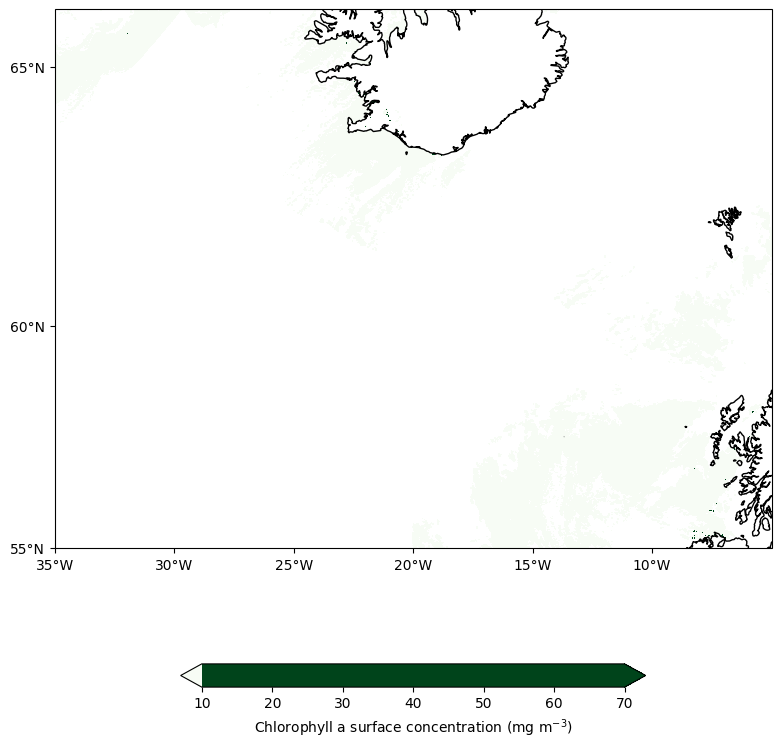

In [4]:
chla_data_1day = chla_data['CHL'][0,:,:]

min_value = np.min(chla_data_1day)
max_value = np.max(chla_data_1day)

print("Minimum value:", min_value)
print("Maximum value:", max_value)

fig = plt.figure(figsize=(20, 10))
ax  = fig.add_subplot(1, 1, 1,
                    projection=ccrs.Mercator())

# Make a filled contour plot
cs = ax.contourf(chla_data['longitude'], chla_data['latitude'], chla_data_1day,
            transform = ccrs.PlateCarree(),cmap='Greens',extend='both',
            vmin=0, vmax=1)

ax.set_extent([min_lon, max_lon, min_lat, max_lat], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE)

# Define the xticks for longitude
ax.set_xticks(np.arange(min_lon,max_lon,5), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
ax.set_yticks(np.arange(min_lat,max_lat,5), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

cbar = plt.colorbar(cs,shrink=0.3,orientation='horizontal',label=r'Chlorophyll a surface concentration (mg m$^{-3}$)')

plt.show()